**LIBRARIES NEEDED**

In [2]:
pip install numpy


In [3]:
pip install matplotlib

In [4]:
pip install tensorflow

In [5]:
pip install opencv-python

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

GET DATA FROM DATASET ALREADY INSIDE KERAS, CALL A LOAD FUNCTION THEN STORE THE DATA IN TRAINING AND TESTING.
NEXT SCALE THE DATA DOWN SO THAT ALL VALUES ARE FROM 0-1 (MAKES IT EASIER TO WORK WITH)

In [7]:
(training_images, training_labels),(testing_images, testing_labels) = datasets.cifar10.load_data()

training_images, testing_images = training_images / 255, testing_images / 255

170498071/170498071 [==============================] - 2s 0us/step


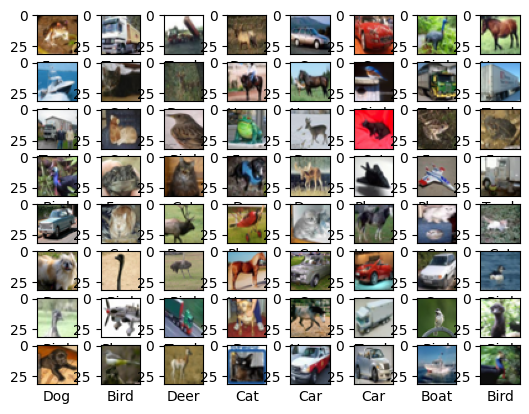

In [40]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']

for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.xticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])


plt.show()

Instead of training the neural network on the whole data, we are picking the first 100,000 training examples and the first 10,000 testing examples

In [9]:
training_images= training_images[:100000]
training_labels = training_labels[:100000]
testing_images = testing_images[:10000]
testing_labels = testing_labels[:10000]


Building the neural network

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model.fit(training_images, training_labels, epochs = 10, validation_data = (testing_images, testing_labels))

Epoch 1/10
1563/1563 [==============================] - 86s 53ms/step - loss: 1.5369 - accuracy: 0.4372 - val_loss: 1.2905 - val_accuracy: 0.5314
Epoch 2/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1561 - accuracy: 0.5894 - val_loss: 1.0674 - val_accuracy: 0.6209
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9973 - accuracy: 0.6479 - val_loss: 0.9652 - val_accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9092 - accuracy: 0.6811 - val_loss: 0.9501 - val_accuracy: 0.6657
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8377 - accuracy: 0.7075 - val_loss: 0.9623 - val_accuracy: 0.6677
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7818 - accuracy: 0.7245 - val_loss: 0.9230 - val_accuracy: 0.6854
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7363 - accuracy: 0.7415 - val_loss: 0.8789 -

Test and Evaluate

In [11]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifier.model')


313/313 [==============================] - 6s 19ms/step - loss: 0.8850 - accuracy: 0.7046
Loss: 0.884972095489502
Accuracy: 0.7045999765396118


1/1 [==============================] - 0s 119ms/step
prediction is Plane


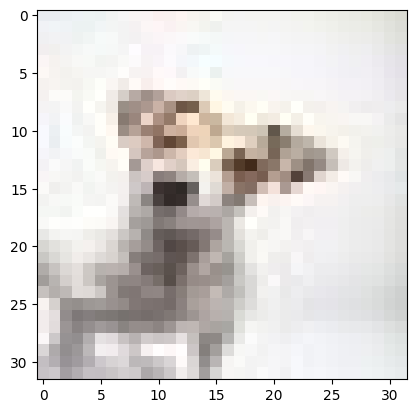

In [44]:
img = cv.imread('de.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 27ms/step
prediction is Plane


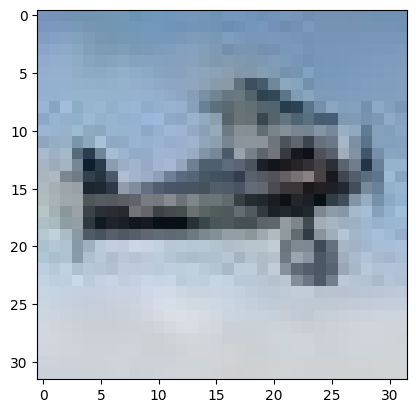

In [31]:
img = cv.imread('plane(1).jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 115ms/step
prediction is Plane


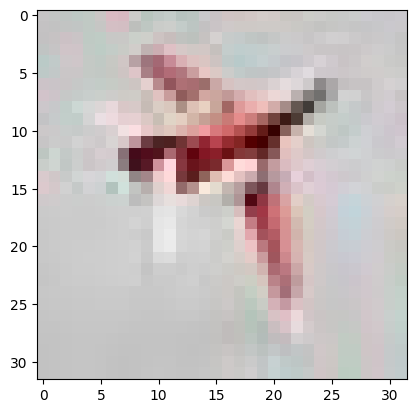

In [38]:
img = cv.imread('pl.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 74ms/step
prediction is Ship


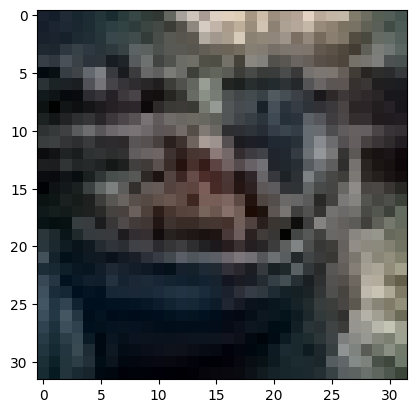

In [33]:
img = cv.imread('r.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 92ms/step
prediction is Cat


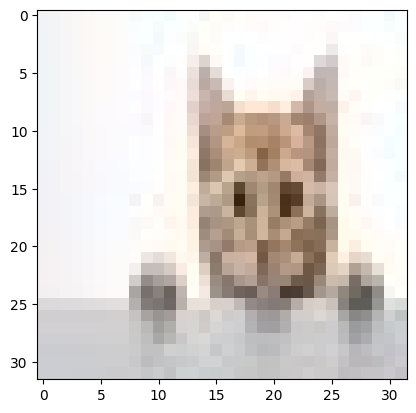

In [36]:
img = cv.imread('ca.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 63ms/step
prediction is Truck


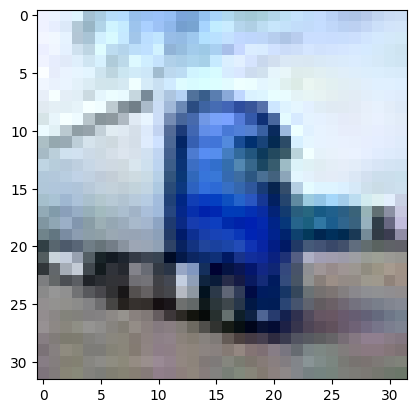

In [25]:
img = cv.imread('tru.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 59ms/step
prediction is Frog


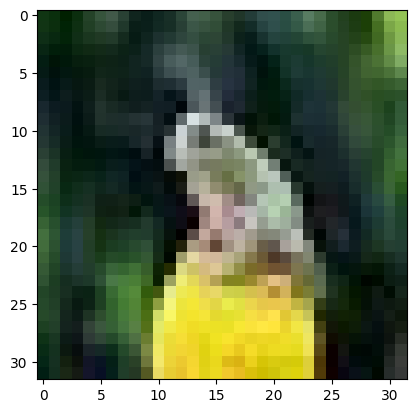

In [35]:
img = cv.imread('fr.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')

1/1 [==============================] - 0s 43ms/step
prediction is Bird


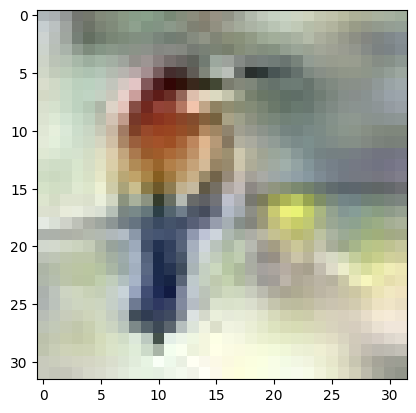

In [15]:
img = cv.imread('bird2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'prediction is {class_names[index]}')